# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

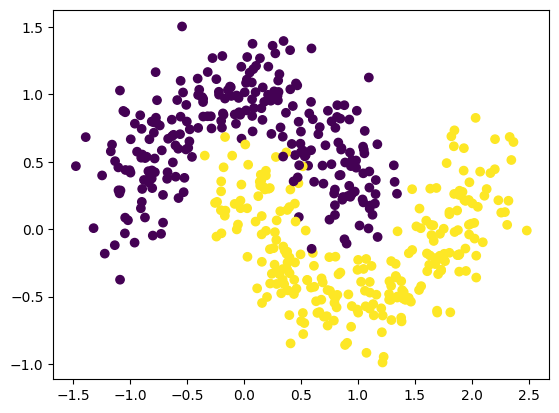

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

lr = LogisticRegression(solver='saga', tol=1e-3, max_iter=100, C = 2, penalty = 'l1')
svm = SVC(kernel='linear', C = 2)

### YOUR CODE HERE

In [5]:
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.35)

In [6]:
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
svm_acc = accuracy_score(y_test, svm_pred)

print('Accuracy of LR:  {}'.format(lr_acc))
print('Accuracy of SVM: {}'.format(svm_acc))

Accuracy of LR:  0.8685714285714285
Accuracy of SVM: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


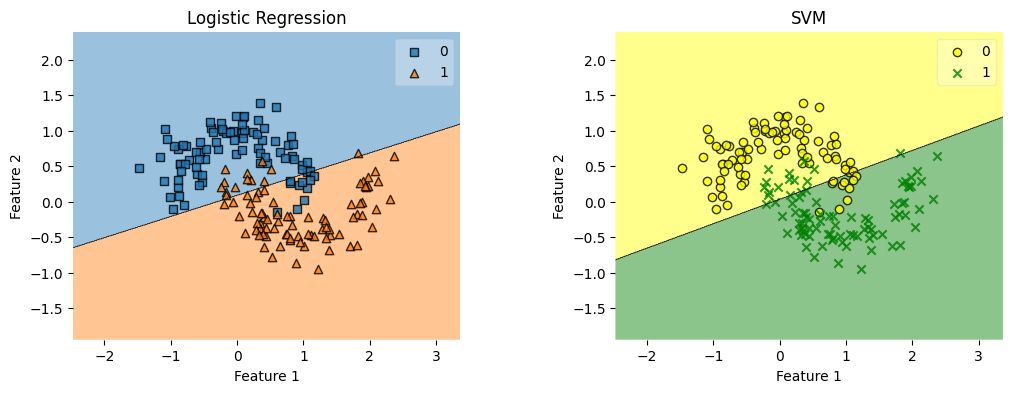

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.subplots_adjust(wspace=0.4)

plot_decision_regions(X_test, y_test, clf=lr, ax=ax[0])
ax[0].set_title('Logistic Regression')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')



plot_decision_regions(X_test, y_test, clf=svm, ax=ax[1], markers='ox', colors = 'yellow,green')
ax[1].set_title('SVM')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.show()

<font color="green"><b>
Explanation:
</b></font>

---



Как видно из графиков, разделение получилось довольно неплохое, с учетом что
метки двух классов линейно не разделимы. Для решения этой проблемы можно использовать нелинейные модели или применять методы преобразования (соответсвенно чем мы и будем заниматься дальше).

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [38]:
### YOUR CODE HERE
# Poly
svc_poly = SVC(kernel='poly', degree=2, C=1.0, gamma='scale')
svc_poly.fit(X_train, y_train)
svc_poly_pred = svc_poly.predict(X_test)
svc_poly_acc = accuracy_score(y_test, svc_poly_pred)

# Rbf
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_rbf.fit(X_train, y_train)
svc_rbf_pred = svc_rbf.predict(X_test)
svc_rbf_acc = accuracy_score(y_test, svc_rbf_pred)

# Sigmoid
svc_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale')
svc_sigmoid.fit(X_train, y_train)
svc_sigmoid_pred = svc_sigmoid.predict(X_test)
svc_sigmoid_acc = accuracy_score(y_test, svc_sigmoid_pred)

print('Accuracy of SVC with poly kernel:  {:.2f}'.format(svc_poly_acc))
print('Accuracy of SVC with rbf kernel:   {:.2f}'.format(svc_rbf_acc))
print('Accuracy of SVC with sigmoid kernel: {:.2f}'.format(svc_sigmoid_acc))

Accuracy of SVC with poly kernel:  0.63
Accuracy of SVC with rbf kernel:   0.98
Accuracy of SVC with sigmoid kernel: 0.69


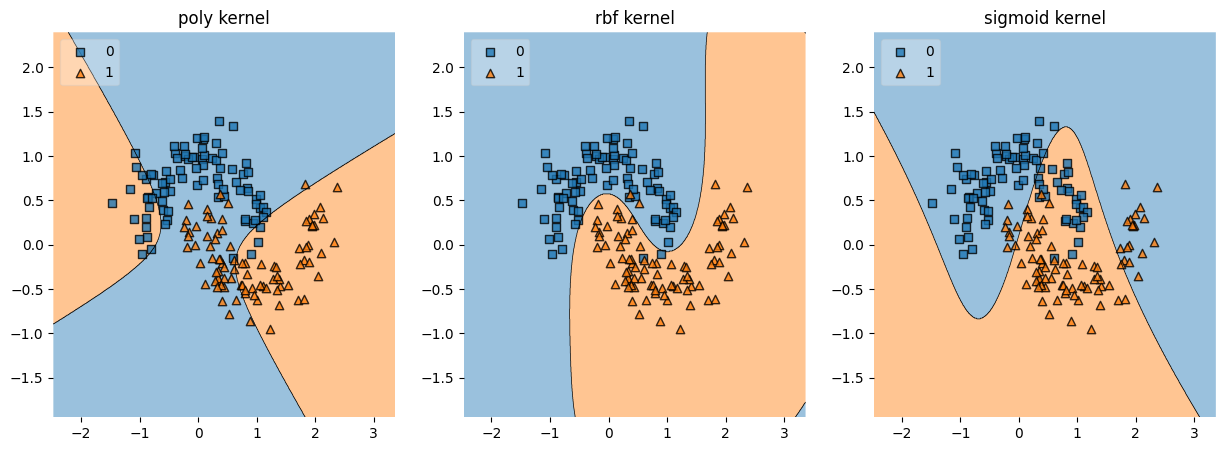

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('poly kernel')
ax[1].set_title('rbf kernel')
ax[2].set_title('sigmoid kernel')

for i, clf in enumerate((svc_poly, svc_rbf, svc_sigmoid)):
    plot_decision_regions(X_test, y_test, clf=clf, ax=ax[i], legend=2)

plt.show()

<font color="green"><b>
Explanation:
</b></font>

---



При использовании rbf ядра точность значительно улучшилась, в других же случаях точность упала, относительно линейного разделения, даже если попробовать поиграться с параметрами, лучше 0.77 сложно выбить (если в poly ядре взять degree = 3 мы получаем что-то вроде линейного разделение с небольшой выпуклостью). Поэтому мы выбираем rbf в качестве нужного ядра.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

### YOUR CODE HERE

for i in range(2,7):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    lr = LogisticRegression(solver='saga', tol=1e-3, max_iter=100, C = 2, penalty = 'l1')
    lr.fit(X_train_poly, y_train)
    lr_pred = lr.predict(X_test_poly)
    lr_acc = accuracy_score(y_test, lr_pred)
    print('Accuracy of LR: {}'.format(lr_acc))

Accuracy of LR: 0.8685714285714285
Accuracy of LR: 0.96
Accuracy of LR: 0.9085714285714286
Accuracy of LR: 0.8457142857142858
Accuracy of LR: 0.7371428571428571


<Axes: title={'center': 'SVC rbf kernel'}>

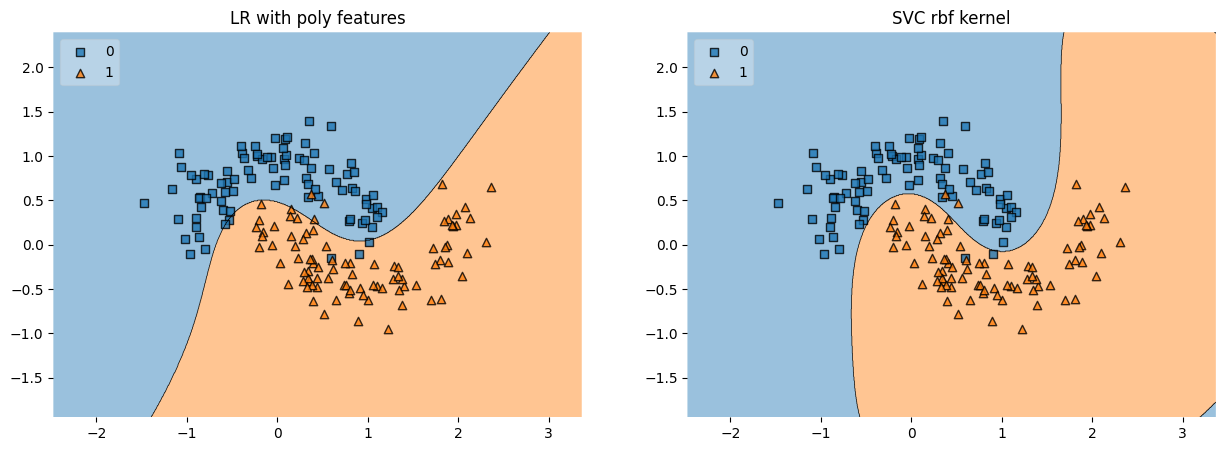

In [63]:
pipeline = make_pipeline(
    PolynomialFeatures(degree=3),
    LogisticRegression(solver='lbfgs')
)

pipeline.fit(X_train, y_train)

# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# plot_decision_regions(X_train, y_train, clf=pipeline, ax=ax)
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('LR with poly features')
ax[1].set_title('SVC rbf kernel')
plot_decision_regions(X_test, y_test, clf=pipeline, ax=ax[0], legend=2)
plot_decision_regions(X_test, y_test, clf=svc_rbf, ax=ax[1], legend=2)

<font color="green"><b>
Explanation:
</b></font>

---



При применении LogisticRegression с полиноминальными фьючами нам удалось добиться лучшей точности равной **0.96**. При этом мы использовали degree = 3. Но это точность все равно меньше чем у SVC при использовании rbf ядра (точность была **0.98**).

Если смотреть на график, можно сказать что у SVC граница с большими отступами, что также позволяет избежать неправильной классификации (основной принцип работы SVM).

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

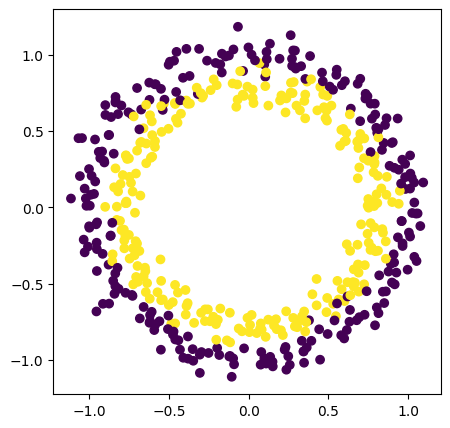

In [67]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

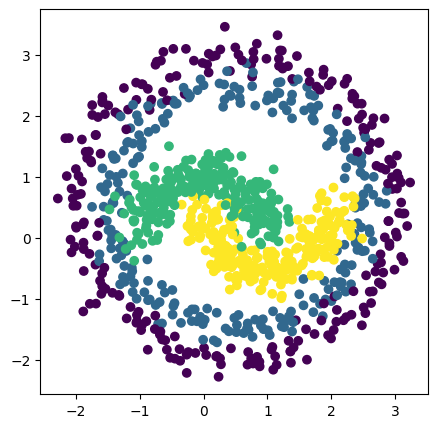

In [68]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [69]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=42)

In [70]:
logreg_pipe = make_pipeline(
    PolynomialFeatures(degree=3),
    LogisticRegression(solver='lbfgs', C=1)
)

logreg_pipe.fit(X_train, y_train)

logreg_acc = logreg_pipe.score(X_test, y_test)
print('Accuracy of Logistic Regression: {}'.format(logreg_acc))

Accuracy of Logistic Regression: 0.895


In [71]:
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

svm_grid = GridSearchCV(svm, param_grid=param_grid, cv=5)
svm_grid.fit(X_train, y_train)

svm_acc = svm_grid.score(X_test, y_test)
print('Accuracy of SVM: {}'.format(svm_acc))

Accuracy of SVM: 0.945


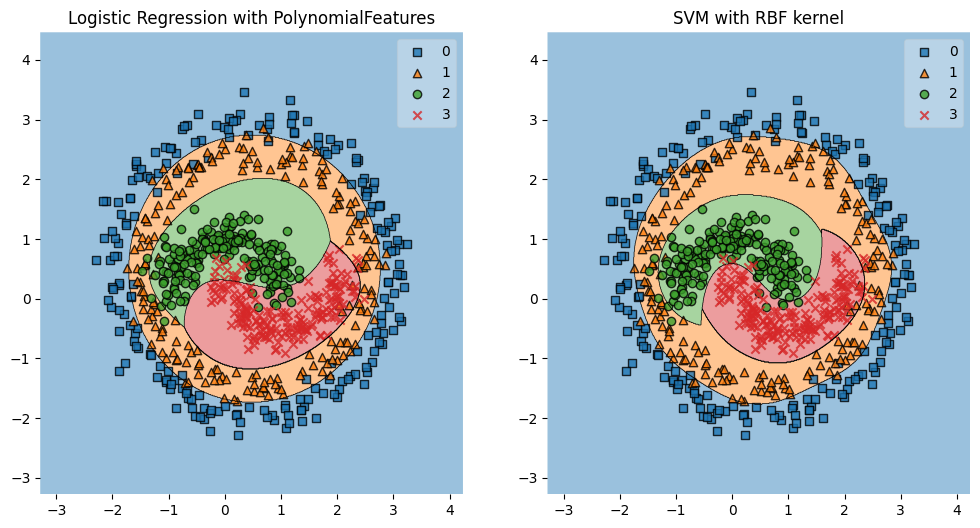

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_regions(X_train, y_train, clf=logreg_pipe, ax=ax[0])
ax[0].set_title('Logistic Regression with PolynomialFeatures')

# Строим границы решения для модели SVM с помощью библиотеки mlxtend
plot_decision_regions(X_train, y_train, clf=svm_grid.best_estimator_, ax=ax[1])
ax[1].set_title('SVM with RBF kernel')
plt.show()

---
Для наглядности попробуем изобразить по другому





In [76]:
def plot_decisions(model, label, X, y):

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.title(f'{label}')
    plt.scatter(X[:, 0], X[:, 1], c=y[:], edgecolors='r', s=60);

    plt.subplot(122)
    plt.title(f'{label} with decision boundaries')
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y[:], edgecolors='r', s=60);

    plt.show()

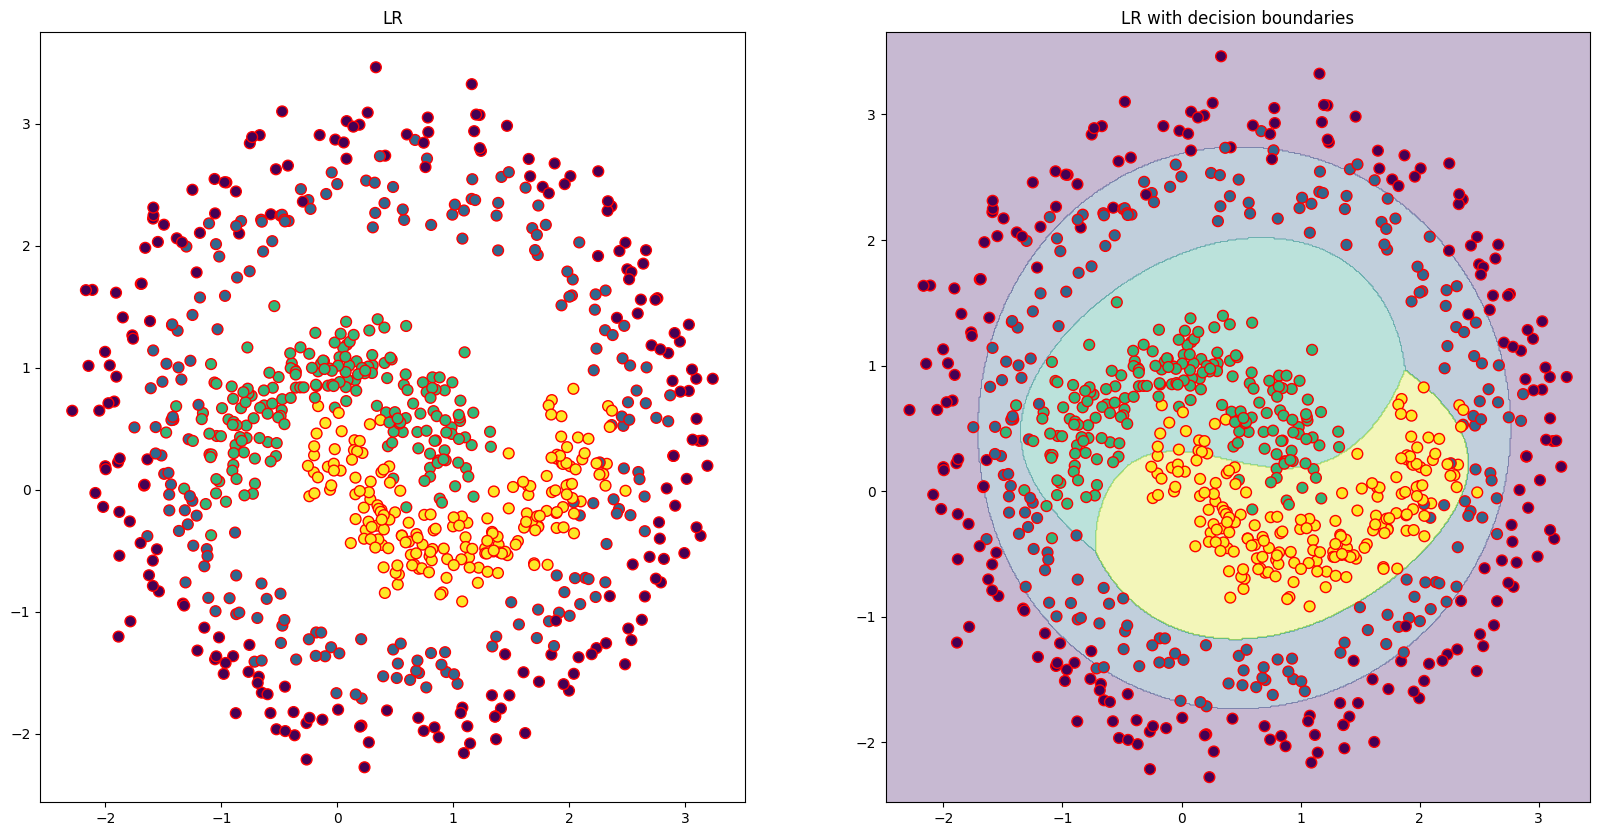

In [78]:
plot_decisions(logreg_pipe, "LR", X_train, y_train)

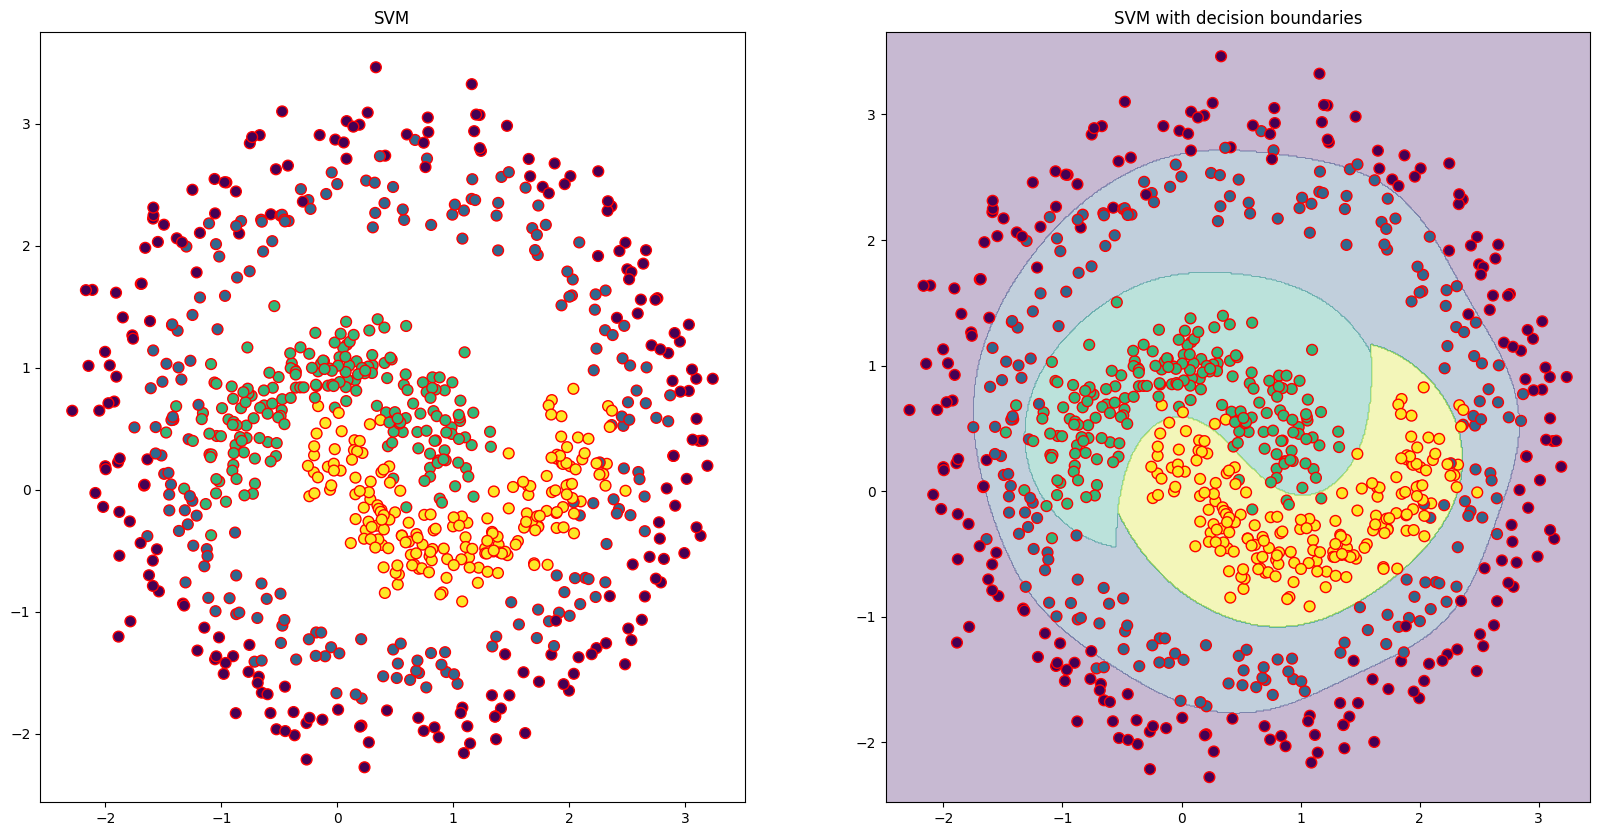

In [79]:
plot_decisions(svm_grid.best_estimator_, "SVM", X_train, y_train)

<font color="green"><b>
Explanation:
</b></font>

---


В результате мы получаем два графика с границами решения для моделей Logistic Regression и SVM. Метрика точности показывает высокую точность для обеих моделей.

Однако стоит отметить, что границы решения для SVM выглядят более сложными и гибкими по сравнению с границами решения для Logistic Regression. Это может быть связано с тем, что SVM использует выбранное ядро для создания нелинейных границ решения.

Таким образом, мы можем заключить, что модель SVM с выбранным ядром может быть более эффективной в данном случае.
